In [16]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
from rdkit.Chem import AllChem as Chem
import matplotlib.pyplot as plt
import massspecgym.utils as utils
%reload_ext autoreload
%autoreload 2

In [2]:
df = utils.load_massspecgym()
df

MassSpecGym.tsv:  72%|#######1  | 189M/262M [00:00<?, ?B/s]

,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
identifier,,,,,,,,,,,,,
MassSpecGymID0000001,"[91.0542, 125.0233, 154.0499, 155.0577, 185.09...","[0.24524524524524524, 1.0, 0.08008008008008008...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
MassSpecGymID0000002,"[91.0542, 125.0233, 155.0577, 185.0961, 229.08...","[0.0990990990990991, 0.28128128128128127, 0.04...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,20.0,train,True
MassSpecGymID0000003,"[69.0343, 91.0542, 125.0233, 127.039, 153.0699...","[0.03403403403403404, 0.31431431431431434, 1.0...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,40.0,train,True
MassSpecGymID0000004,"[69.0343, 91.0542, 110.06, 111.0441, 112.0393,...","[0.17917917917917917, 0.47347347347347346, 0.0...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,55.0,train,True
MassSpecGymID0000005,"[91.0542, 125.0233, 185.0961, 229.0859, 246.11...","[0.07807807807807808, 0.1841841841841842, 0.03...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,10.0,train,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MassSpecGymID0414168,"[55.054474, 58.029369, 58.065601, 59.049339, 6...","[0.0004935684823754727, 0.00012405427491363124...",CC[C@@H]1[C@H](/C=C(/C=C\C(=O)[C@@H](C[C@@H]([...,WBPYTXDJUQJLPQ,C46H77NO17,C46H78NO17,915.521724,916.5290,[M+H]+,QTOF,NaN,val,False
MassSpecGymID0414171,"[72.043739, 86.060242, 98.058304, 99.0634, 126...","[0.0019527744563354998, 0.0016939927337585416,...",C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...,DHPRQBPJLMKORJ,C22H23ClN2O8,C22H24ClN2O8,478.115724,479.1230,[M+H]+,QTOF,NaN,test,False
MassSpecGymID0414172,"[72.080132, 102.233917, 113.082344, 113.121498...","[0.021173783463613503, 0.007516001055215398, 0...",C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...,CEAZRRDELHUEMR,C21H43N5O7,C21H44N5O7,477.317724,478.3250,[M+H]+,QTOF,NaN,val,False


## Different spectra with same molecules

/var/folders/yw/q5k8tqgn3tq8_y9lbqhwm_8m0000gn/T/ipykernel_3552/1183696070.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hist = df.groupby('inchikey').apply(len)


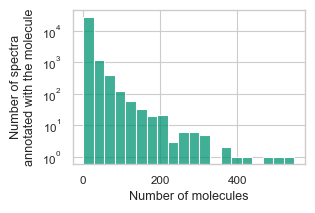

In [72]:
utils.init_plotting(figsize=(3, 2))
hist = df.groupby('inchikey').apply(len)
sns.histplot(hist, bins=20)
plt.yscale('log')
plt.xlabel('Number of molecules')
plt.ylabel('Number of spectra\nannotated with the molecule')
plt.savefig('mols_hist.svg', bbox_inches='tight')

In [85]:
df['smiles'].value_counts().head(20)

smiles
CC1C(C(C(C(O1)OC2C(C(C(OC2OC3CC4(C(CC(C5C4(CCC5C(C)(CCC=C(C)C)OC6C(C(C(C(O6)CO)O)O)O)C)O)C7(C3C(C(CC7)O)(C)C)C)C)CO)O)O)O)O)O    542
CC1(C2CCC3(C(C2(CCC1OC4C(C(C(C(O4)C(=O)O)O)O)OC5C(C(C(C(O5)C(=O)O)O)O)O)C)C(=O)C=C6C3(CCC7(C6CC(CC7)(C)C(=O)O)C)C)C)C            477
COC1=C(C=C(C=C1)C2CC(=O)C3=C(C=C(C=C3O2)O)O)O                                                                                    476
CC(=CCCC(C)(C1CCC2(C1C(CC3C2(CCC4C3(CCC(C4(C)C)OC5C(C(C(C(O5)CO)O)O)OC6C(C(C(C(O6)CO)O)O)O)C)C)O)C)O)C                           373
COC1=C(C=CC(=C1)C=O)O                                                                                                            366
COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O                                                                                       324
C1=C2C3=C(C(=C1O)O)OC(=O)C4=CC(=C(C(=C43)OC2=O)O)O                                                                               322
CN(C)CCC1=CC=C(C=C1)O                                         

In [89]:
df_example = df[df['smiles'] == 'C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O']
df_example

,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
identifier,,,,,,,,,,,,,
MassSpecGymID0024469,"[119.0483, 131.048, 145.0258, 149.0228, 153.01...","[0.007007007007007007, 0.009009009009009009, 0...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052824,271.0601,[M+H]+,QTOF,25.0,train,True
MassSpecGymID0024470,"[149.0221, 153.0174, 215.0696, 243.0648, 253.0...","[0.008008008008008008, 0.014014014014014014, 0...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052824,271.0601,[M+H]+,QTOF,20.0,train,True
MassSpecGymID0024471,"[115.0535, 121.0276, 127.0533, 128.0618, 131.0...","[0.32232232232232233, 0.0970970970970971, 0.10...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052824,271.0601,[M+H]+,QTOF,50.0,train,True
MassSpecGymID0024473,"[115.0532, 119.0485, 121.0283, 129.0702, 131.0...","[0.05005005005005005, 0.06806806806806807, 0.0...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052824,271.0601,[M+H]+,QTOF,40.0,train,True
MassSpecGymID0024474,"[121.026, 131.0491, 135.0424, 137.0213, 141.06...","[0.01701701701701702, 0.01901901901901902, 0.0...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052824,271.0601,[M+H]+,QTOF,30.0,train,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MassSpecGymID0025125,"[91.055313, 97.996696, 105.069687, 107.050133,...","[0.04353861686017163, 0.0102221100454316, 0.01...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052724,271.0600,[M+H]+,QTOF,NaN,train,False
MassSpecGymID0025126,"[91.05381, 145.029099, 149.022751, 153.019501,...","[0.0364, 0.0308, 0.0404, 0.2424, 0.0376, 0.040...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.053724,271.0610,[M+H]+,QTOF,NaN,train,False
MassSpecGymID0025127,"[53.074085, 53.759258, 63.713455, 65.27813, 66...","[0.000987395584605132, 0.001150970049713086, 0...",C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,TZBJGXHYKVUXJN,C15H10O5,C15H11O5,270.052724,271.0600,[M+H]+,QTOF,NaN,train,False


In [90]:
display(df_example['adduct'].value_counts())
display(df_example['instrument_type'].value_counts())
display(df_example['collision_energy'].value_counts())

adduct
[M+H]+     276
[M+Na]+     45
Name: count, dtype: int64

instrument_type
Orbitrap    269
QTOF         50
Name: count, dtype: int64

collision_energy
6.000000      11
55.000000     10
30.000000      9
35.000000      8
50.000000      6
40.000000      6
20.000000      5
45.000000      5
60.000000      5
90.000000      3
80.000000      3
10.000000      3
75.000000      3
180.000000     2
8.131803       2
13.553005      2
120.000000     2
150.000000     2
25.000000      2
15.000000      1
48.790818      1
37.948414      1
43.369616      1
Name: count, dtype: int64

In [91]:
df_example[df_example['instrument_type'] == 'QTOF']['collision_energy'].value_counts()

collision_energy
6.0     11
50.0     6
40.0     6
30.0     6
20.0     5
10.0     3
25.0     2
15.0     1
60.0     1
55.0     1
Name: count, dtype: int64

In [93]:
df_example[df_example['instrument_type'] == 'Orbitrap']['collision_energy'].value_counts()

collision_energy
55.000000     9
35.000000     8
45.000000     5
60.000000     4
30.000000     3
75.000000     3
90.000000     3
80.000000     3
150.000000    2
120.000000    2
180.000000    2
8.131803      2
13.553005     2
48.790818     1
37.948414     1
43.369616     1
Name: count, dtype: int64

Id: MassSpecGymID0024497
Adduct: [M+H]+
Instrument type: QTOF
Collision energy: 6.0
Precursor m/z: 271.0601


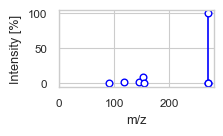

In [95]:
row = df_example[
    (df_example['instrument_type'] == 'QTOF') &
    (df_example['collision_energy'] < 10)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_qtof_6_mph.svg', dpi=300, bbox_inches='tight')

Id: MassSpecGymID0024474
Adduct: [M+H]+
Instrument type: QTOF
Collision energy: 30.0
Precursor m/z: 271.0601


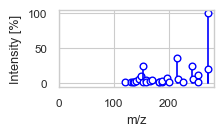

In [100]:
row = df_example[
    (df_example['instrument_type'] == 'QTOF') &
    (df_example['collision_energy'] == 30)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_qtof_30_mph.svg', dpi=300, bbox_inches='tight')

Id: MassSpecGymID0024494
Adduct: [M+H]+
Instrument type: QTOF
Collision energy: 60.0
Precursor m/z: 271.0601


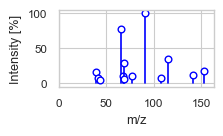

In [103]:
row = df_example[
    (df_example['instrument_type'] == 'QTOF') &
    (df_example['collision_energy'] == 60)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_qtof_60_mph.svg', dpi=300, bbox_inches='tight')

Id: MassSpecGymID0024495
Adduct: [M+H]+
Instrument type: Orbitrap
Collision energy: 8.131803
Precursor m/z: 271.0601


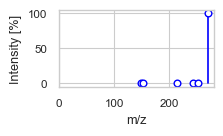

In [104]:
row = df_example[
    (df_example['instrument_type'] == 'Orbitrap') &
    (df_example['collision_energy'] < 10)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_orbitrap_8_mph.svg', dpi=300, bbox_inches='tight')

Id: MassSpecGymID0024480
Adduct: [M+H]+
Instrument type: Orbitrap
Collision energy: 30.0
Precursor m/z: 271.0601


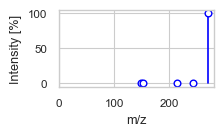

In [106]:
row = df_example[
    (df_example['instrument_type'] == 'Orbitrap') &
    (df_example['collision_energy'] == 30)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_orbitrap_30_mph.svg', dpi=300, bbox_inches='tight')

Id: MassSpecGymID0024483
Adduct: [M+H]+
Instrument type: Orbitrap
Collision energy: 60.0
Precursor m/z: 271.0601


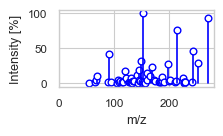

In [108]:
row = df_example[
    (df_example['instrument_type'] == 'Orbitrap') &
    (df_example['collision_energy'] == 60)
].iloc[0]
print('Id:', row.name)
print('Adduct:', row['adduct'])
print('Instrument type:', row['instrument_type'])
print('Collision energy:', row['collision_energy'])
print('Precursor m/z:', row['precursor_mz'])
spec = np.stack([row['mzs'], row['intensities']])
utils.plot_spectrum(spec, figsize=(2, 1))
plt.savefig('example_spectrum_orbitrap_60_mph.svg', dpi=300, bbox_inches='tight')

## Candidates

In [ ]:
utils.show_mols()